## DATA SIZE
In order to investigate the effect of data size on the
fit, a single large data set of 8000 points (4000 training,
4000 validation) was split into multiple smaller sections.
The model was subsequently independently trained on
each section. The accuracy of each model was measured
by the success of predicting the labels of the 4000 point
validation set. In addition, a linearly spaced grid of predicted values was plotted and overlaid with the input
data and the original distribution.

# Generate/load in a large data set of 8000 points 

In order to be able to see how adding more data points would affect the fit, the same data set was used for each run but expanded/shrank depending on the required size. In this way a direct comparison be made between the effects of data size on a smaller and larger fit.   

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

def filename(s,TYPE=1): #goes to sub folder data  #Type saves wasted data? 
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

def create_dataset(N):
  TYPE=1 #looks like just added to file name
  # random seed for reproducibility
  np.random.seed(12345)
  print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))# random seed test

  x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
  for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

  !mkdir DATA        
  np.savetxt(filename("data_size",N),x)
  np.savetxt(filename("data_size_labels",N),y,fmt="%d")

def load_dataset(N):          
  x = np.loadtxt(filename("data_size", N), delimiter = ' ')
  y = np.loadtxt(filename("data_size_labels", N), delimiter = ' ')
  return x, y
  
N = 8000
!mkdir DATA
# create_dataset(N)
x, y = load_dataset(N)

mkdir: cannot create directory ‘DATA’: File exists


# Set up the NN model to be trained
The neural network with the best parameters found via the prior grid search is used here 

In [14]:
#############################definitions#############################
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

def compile_model(optimizer='RMSprop',activation='elu', neurons=20, dropout_rate=0, hidden_layers=4): #Daniel's Optimal model.
    L=2 #size of input data points
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))
    initial = tf.keras.initializers.RandomNormal(mean = 0., stddev = 1., seed = 12345)
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation,kernel_initializer = initial))
        model.add(Dropout(dropout_rate))
  
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',  #tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

def boundaries(): 
    ax.plot((-20,-20),(-40,60),c="r")
    ax.plot((-20,80),(-40,-40),c="r")
    ax.plot((-20,80),(60,-40),c="r")

############################# end defs #############################

# Run and investigate model on many data sizes.

The NN here is ran on trained on various data sizes the first 9 where the model is estabishing are plotted here showing the model prediction in space. 

Training data length: 2 , Validation Length =  4000 , Accuracy =  0.3697499930858612


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Training data length: 5 , Validation Length =  4000 , Accuracy =  0.6800000071525574
Training data length: 10 , Validation Length =  4000 , Accuracy =  0.6392499804496765
Training data length: 20 , Validation Length =  4000 , Accuracy =  0.8532500267028809
Training data length: 40 , Validation Length =  4000 , Accuracy =  0.7935000061988831
Training data length: 50 , Validation Length =  4000 , Accuracy =  0.8445000052452087
Training data length: 60 , Validation Length =  4000 , Accuracy =  0.9327499866485596
Training data length: 80 , Validation Length =  4000 , Accuracy =  0.9337499737739563
Training data length: 100 , Validation Length =  4000 , Accuracy =  0.9559999704360962
Training data length: 120 , Validation Length =  4000 , Accuracy =  0.9497500061988831
Training data length: 150 , Validation Length =  4000 , Accuracy =  0.9617499709129333
Training data length: 200 , Validation Length =  4000 , Accuracy =  0.9725000262260437
Training data length: 500 , Validation Length =  40

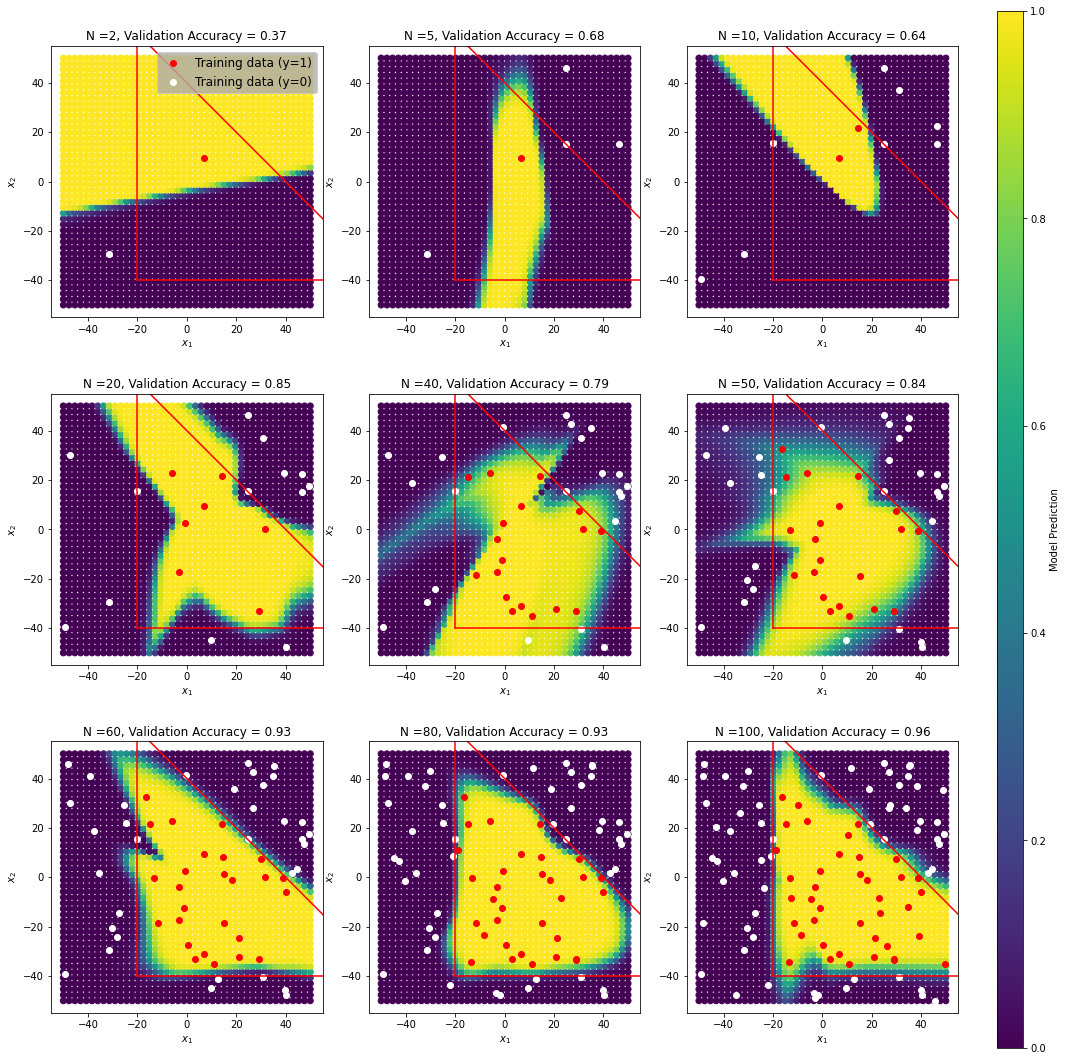

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)
V= 4000 
v_scores = []
data_size = [2,5,10,20, 40, 50, 60, 80,100,120,150,200,500, 1000,1500,2000,2500,3000,3500,4000]
fig,AX=plt.subplots(3,3,figsize=(18,18))
R, C =0, 0

for N_train in data_size:

  (x_train, y_train) = (x[0:N_train],y[0:N_train])
  (x_valid, y_valid) = (x[len(x)-V:],y[len(x)-V:])  
  xp = x_train #need to preserve unscaled
  x_train = Rescale(x_train)
  x_valid = Rescale(x_valid)
  
  optModel = compile_model()
  fit = optModel.fit(x_train, y_train,
                        epochs = 300, batch_size = 50,
                        validation_data=(x_valid,y_valid),
                        verbose=0)
  
  loss, acc = optModel.evaluate(x=x_valid, y=y_valid, verbose = 0)
  v_scores.append(acc)
  print('Training data length:',len(x_train), ', Validation Length = ', len(x_valid),  ', Accuracy = ', acc  )
  
  #Plot the first 9 graphs in one large subplot
  if R <3 and C<3  : #only plot the first 9 where the cisulisation is useful   
    dX = 2 
    LG = int(np.sqrt(4000/2))
    x1 = np.linspace(-50,50,LG)
    x2 = np.linspace(-50,50,LG)
    grid = np.zeros((LG*LG,2))
    k=0
    for i in range(LG):
        for j in range(LG):
            grid[k,:]=(x1[j],x2[i])
            k=k+1

    grid_r = grid/50
    pred = optModel.predict(grid_r)

    tri_mask = [y_train==1]
    inv_tri_mask = [y_train!=1]
    ax=AX[C][R]

    t1 = ax.scatter(grid[:,0],grid[:,1],c=pred)
    ax.set_title('N =' + str(N_train) + ', Validation Accuracy = ' + str(round(acc,2)))
    boundaries()
    ax.scatter(xp[:,0][tri_mask],xp[:,1][tri_mask], c='red', label = 'Training data (y=1)')
    ax.scatter(xp[:,0][inv_tri_mask],xp[:,1][inv_tri_mask], c='white', label='Training data (y=0)')
    ax.set_xlim(-55,55)
    ax.set_ylim(-55,55)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set(adjustable='box', aspect='equal')
    if R==0 and C==0:# Only first graph has legend 
      ax.legend(facecolor='#aeadad', fontsize = 12)

    if R >1:# Graph matrix index 
      C+=1
      R=0
    else:
      R +=1
      
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.17, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
fig.colorbar(t1, label ='Model Prediction', cax=cb_ax)
print(v_scores)

# Plot the accuracy vs data size
Inset graph added as over the whole data range the key range in which the model is able to establish is squashed. 

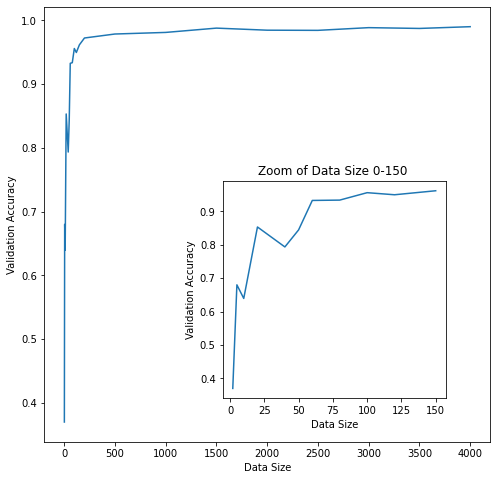

In [10]:
fig, ax =plt.subplots(1,1,figsize=(8,8))

ax.plot(data_size, v_scores)
ins = ax.inset_axes([0.4,0.1,0.5,0.5])
ax.set_xlabel("Data Size")
ax.set_ylabel("Validation Accuracy")
ins.plot(data_size[:11], v_scores[:11])
ins.set_xlabel("Data Size")
ins.set_ylabel("Validation Accuracy")
ins.set_title("Zoom of Data Size 0-150 ")
plt.show()

# Close up of 4 key data sizes

Training data length: 20 , Validation Length =  4000 , Accuracy =  0.8410000205039978


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Training data length: 50 , Validation Length =  4000 , Accuracy =  0.7787500023841858
Training data length: 100 , Validation Length =  4000 , Accuracy =  0.9340000152587891
Training data length: 200 , Validation Length =  4000 , Accuracy =  0.9639999866485596
[0.8410000205039978, 0.7787500023841858, 0.9340000152587891, 0.9639999866485596]


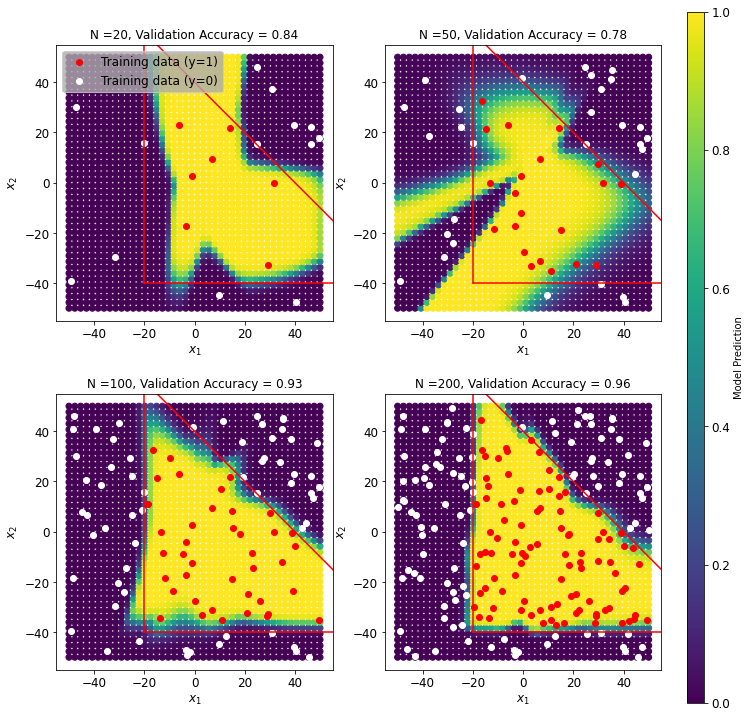

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

V= 4000 #just adding on a set amount of vaild data points
v_scores2 = []
data_size2 = [20, 50, 100, 200]
fig,AX=plt.subplots(2,2,figsize=(12,12))
R, C =0, 0

for N_train in data_size:

  (x_train, y_train) = (x[0:N_train],y[0:N_train])
  (x_valid, y_valid) = (x[len(x)-V:],y[len(x)-V:])
  
  xp = x_train #need to preserve unscaled
  x_train = Rescale(x_train)
  x_valid = Rescale(x_valid)
  
  optModel = compile_model()
  fit = optModel.fit(x_train, y_train,
                        epochs = 300, batch_size = 50,
                        validation_data=(x_valid,y_valid),
                        verbose=0)
  
  loss, acc = optModel.evaluate(x=x_valid, y=y_valid, verbose=0)
  v_scores2.append(acc)
  print('Training data length:',len(x_train), ', Validation Length = ', len(x_valid),  ', Accuracy = ', acc  )
  if R <3 and C<3  : #only plot the first 9 where the results are   

    #test_triangles(optModel, xp, y_train, N, acc)
    dX = 2 
    LG = int(np.sqrt(4000/2))
    x1 = np.linspace(-50,50,LG)
    x2 = np.linspace(-50,50,LG)
    grid = np.zeros((LG*LG,2))
    k=0
    for i in range(LG):
        for j in range(LG):
            grid[k,:]=(x1[j],x2[i])
            k=k+1

    grid_r = grid/50
    pred = optModel.predict(grid_r)

    tri_mask = [y_train==1]
    inv_tri_mask = [y_train!=1]
    
    ax=AX[C][R]
    t1 = ax.scatter(grid[:,0],grid[:,1],c=pred)
    ax.set_title('N =' + str(N_train) + ', Validation Accuracy = ' + str(round(acc,2)))
    boundaries()
    ax.scatter(xp[:,0][tri_mask],xp[:,1][tri_mask], c='red', label = 'Training data (y=1)')
    ax.scatter(xp[:,0][inv_tri_mask],xp[:,1][inv_tri_mask], c='white', label='Training data (y=0)')
    ax.set_xlim(-55,55)
    ax.set_ylim(-55,55)
    ax.set_xlabel('$x_1$', fontsize = 12)
    ax.set_ylabel('$x_2$', fontsize = 12)
    ax.set(adjustable='box', aspect='equal')
    ax.tick_params(labelsize=12)

    if R==0 and C==0:
      ax.legend(facecolor='#aeadad', fontsize = 12)
    if R >0:# Graph matrix index 
      C+=1
      R=0
    else:
      R +=1
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.19, hspace=0.02) #create pl



cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar =fig.colorbar(t1, label ='Model Prediction', cax=cb_ax)
cbar.ax.tick_params(labelsize=12)
print(v_scores2)